## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
from sklearn import datasets, metrics

# 如果是分類問題使用 DecisionTreeClassifier，回歸問題使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data , columns = iris.feature_names)
# print(dir(iris))
print(df.head(3))
df.describe()

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
x_train, x_test , y_train , y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
clf.score(x_test,y_test) #預測分數

0.9736842105263158

In [4]:
#check errors,this only for Classifier case.
print(y_pred)
print(y_test)

error = 0 
for i, v in enumerate(y_pred):
    if v != y_test[i]:
        print(f'index {i:.0f}',f'have error {v:.0f}')
        error += 1
print(f'total number of errors = {error:.0f}')

[2 0 2 2 2 1 2 0 0 2 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2 1 0 2 0 1 2 2
 1]
[2 0 2 2 2 1 1 0 0 2 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2 1 0 2 0 1 2 2
 1]
index 6 have error 2
total number of errors = 1


### criterion :(default=”gini”)

In [5]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
clf.score(x_test,y_test)

0.9736842105263158

### splitter :(default=”best”)

In [6]:
clf = DecisionTreeClassifier(splitter='random')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
clf.score(x_test,y_test)

0.9473684210526315

### min_samples_split :(default=2)

In [7]:
clf = DecisionTreeClassifier(min_samples_split=1.0)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
clf.score(x_test,y_test)

0.6842105263157895

### presort : (default=False)

In [8]:
clf = DecisionTreeClassifier(presort='True')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
clf.score(x_test,y_test)

0.9736842105263158

In [21]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

In [25]:
dot_data = export_graphviz(
    clf, 
    filled = True,
    rounded = True,
    class_names = iris.target_names,
    feature_names = iris.feature_names,
    out_file = None)
graph = graph_from_dot_data(dot_data)
# graph.write_png('tree.png') # for output pic

True

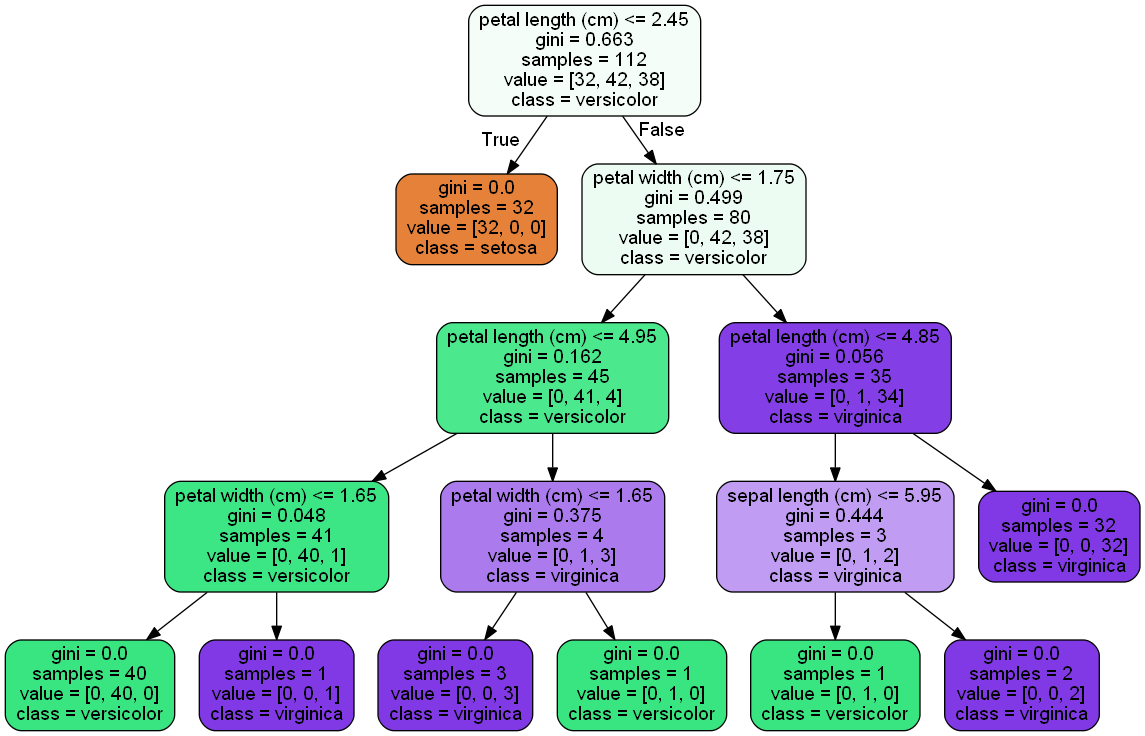

In [27]:
from IPython.display import Image
Image(filename = 'tree.png', width=800)

## 作業2 boston

In [9]:
boston = datasets.load_boston()
dd = pd.DataFrame(boston.data , columns = boston.feature_names )
dd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### boston data需將各個不同欄位數值進行Z-SCORE 
refer https://www.zhihu.com/question/21600637 

In [10]:
dd2 = (dd - dd.mean()) / dd.std() #z轉換
dd2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.417300,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.414859,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,-0.414861,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,-0.414270,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,-0.410003,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487


In [11]:
X = dd2.values  #數值內容都做z轉換
Y = boston.target
X_train, X_test , Y_train , Y_test  = train_test_split(X , Y, test_size=0.25 ,random_state=4)

# X_train, X_test , Y_train , Y_test  = train_test_split(boston.data , boston.target, test_size=0.25 ,random_state=4)

clf2 = DecisionTreeRegressor() #回歸

clf2.fit(X_train,Y_train)

y_pred2 = clf2.predict(X_test)

acc = metrics.r2_score(Y_test, y_pred2)  #metrics.r2_score
print(f"Accuracy:{acc:.3f}")

Accuracy:0.720


In [12]:
print(y_pred2)
print(Y_test) #ground truth

[14.4 22.  20.9 22.5 50.  22.5 34.7 22.5 17.2 14.8 23.9 16.5 21.9 23.3
 23.  13.4 16.2 12.8 11.9 14.8 13.1 17.8 20.5 20.1 20.4 20.1 13.4 15.2
 23.1 21.5  9.5 23.1 33.8 20.3 13.1 12.3 33.2 43.1 24.8 22.5 46.  32.
 12.7 30.1 27.5 20.9 50.  19.4 22.6 22.2 30.8 23.8 11.5 27.1 14.8 19.3
 27.5 33.1 14.5 33.1 16.2 21.5 37.  19.3 43.1 30.1 21.   8.3 22.5 23.1
 21.7 16.2 22.  30.1 21.5 33.4 14.5 21.  17.7 20.4 21.7 15.  27.9 19.9
 25.  20.6 33.1 24.5 22.5 50.  29.  50.  19.4 50.  24.4 19.4 21.  23.1
 15.6 19.   8.4 19.3 34.9 14.5 23.3 19.9 34.7 32.9 50.  22.3 20.1 19.6
 12.7 37.  33.8 21.4 48.8 15.4  7.  19.6 21.2 11.5 22.5 21.4 17.2 24.
 50. ]
[16.5 24.8 17.4 19.3 37.6 24.2 35.4 19.9 27.5 17.  31.2 24.4 16.1 27.
 21.  14.9 18.9  6.3 16.3 13.9  8.8 19.4 18.8 19.8 17.5 19.3 20.  14.3
 16.1 19.5 11.  21.9 31.  22.  15.1 13.3 28.7 46.7 22.2 22.8 42.3 41.3
 16.7 31.1 26.7 19.4 50.  16.6 19.5 24.4 28.5 22.3 12.1 28.6 15.6 19.2
 27.5 32.  20.2 32.4 18.4 19.9 29.8 20.1 43.5 24.5 50.   7.2 19.1 21.2
 2

In [ ]:
notice:
"accuracy_score" is for classification tasks only ,for example: 'metrics.accuracy_score(y_test, y_pred)'
For 'regression' you should use something different, for example: "clf.score(X_test, y_test)"
refer to : https://stackoverflow.com/questions/32664717/got-continuous-is-not-supported-error-in-randomforestregressor